In [1]:
from astropy.io import ascii
from matplotlib.pyplot import *
import numpy as np
import pandas as pd

In [2]:
big_grid = pd.read_csv('/home/nielsemb/work/big_grid.csv')

In [37]:
 
Teff = 5413
numax = 1084.7
idxG = (Teff - 50 < big_grid['effective_T']) & (big_grid['effective_T'] < Teff + 50) & \
       (numax - 10 < big_grid['nu_max']) & (big_grid['nu_max'] < numax + 10)
G_dnu = big_grid['Δν'][idxG] 
G_DPi1 = big_grid['delta_Pg'][idxG]
G_DPi0 = G_DPi1*np.sqrt(2)

In [5]:
def line(x, a, b):
    return a*x+b

table = ascii.read("ftp://cdsarc.cds.unistra.fr/ftp/J/A+A/588/A87/table2.dat",
                   readme="ftp://cdsarc.cds.unistra.fr/ftp/J/A+A/588/A87/ReadMe")


_dnu = table['Dnu']

x = table['DPi1']/np.sqrt(2)


midx = (table['Measure'] >= 1)
aidx = (table['Alias'] == 0)
idx0 = np.invert((line(_dnu, 1.2, 45) < x) & (x < line(_dnu, 1, 70)))
idx1 = np.invert((line(_dnu, 1.7, 40) < x) & (x < line(_dnu, 1, 70)))
idx2 = np.invert((_dnu < 10) & (x < line(_dnu, 1.9, 32)))
idx3 = np.invert((10 < _dnu) & (x < line(_dnu, 1.1, 40)))
idx4 = np.invert(np.log10(x) > line(np.log10(_dnu), -0.43, 2.69))
idx5 = np.invert((np.log10(_dnu) < 0.8) & 
                 (np.log10(x) < line(np.log10(_dnu), -0.33, 2.34)) & 
                 (np.log10(x) > line(np.log10(_dnu), 0.1, 1.75)))
idx6 = np.invert(_dnu < 3.1)

idxT = midx & aidx & idx0 & idx1 & idx2 & idx3 & idx4 & idx5 & idx6

dnu = _dnu[idxT]
DPi1 = table['DPi1'][idxT]
DPi0 = DPi1 * np.sqrt(2)

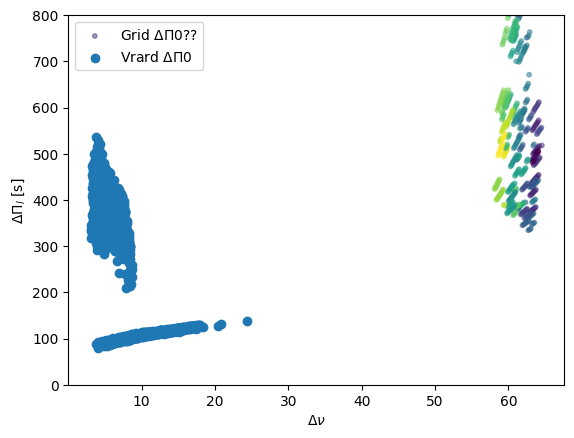

In [20]:
fig, ax = subplots()
ax.scatter(G_dnu, G_DPi0, alpha=0.5, label='Grid $\Delta\Pi0$??', s = 10, c=big_grid['FeH'][idxG])

#ax.scatter(G_dnu, G_DPi1, alpha=0.1, label='Grid $\Delta\Pi1$??', s = 2)

ax.scatter(dnu, DPi0, label='Vrard $\Delta\Pi0$')
#ax.scatter(dnu, DPi1, label='Vrard $\Delta\Pi1$')
ax.set_ylim(0, 800)
ax.set_xlabel(r'$\Delta \nu$')
ax.set_ylabel(r'$\Delta \Pi_l$ [s]')
ax.legend()

Text(0.5, 0, '$\\Delta\\Pi0$')

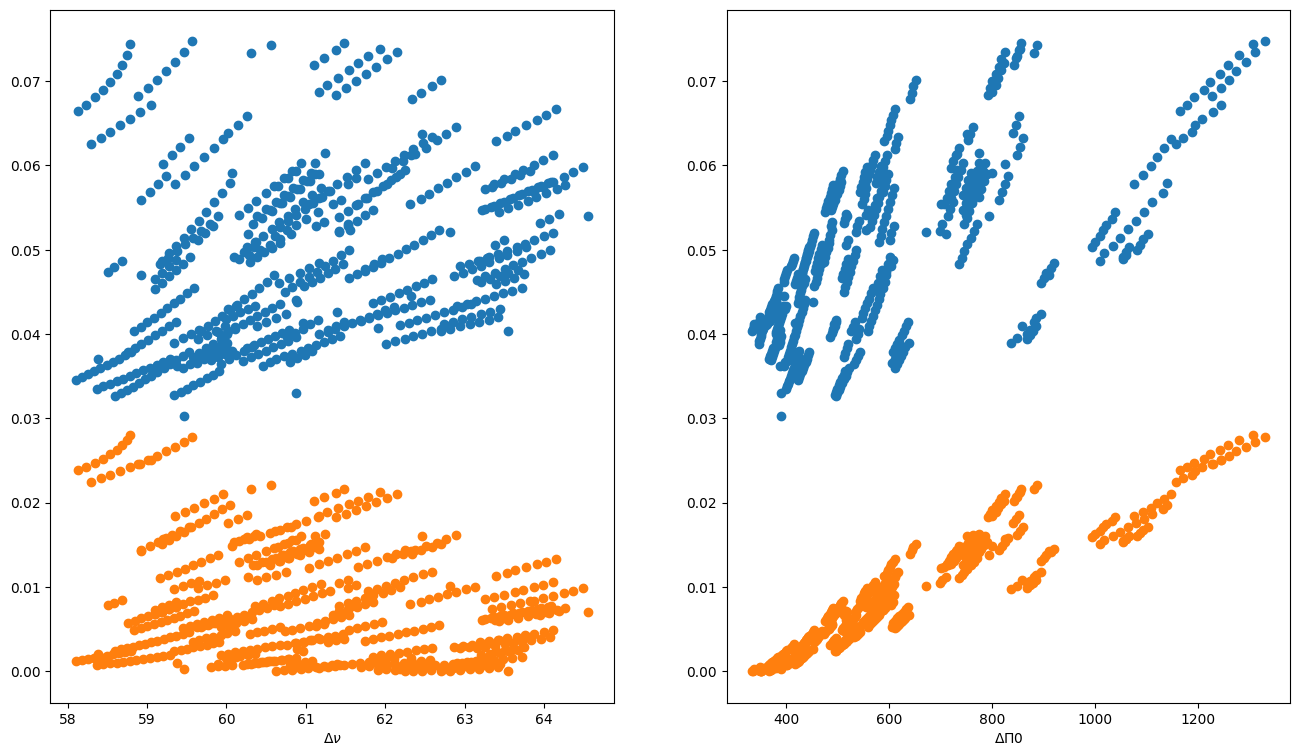

In [41]:
fig, ax = subplots(1,2, figsize=(16,9))

ax[0].scatter(G_dnu, abs(big_grid['p_L'][idxG]), label='p_L')
ax[0].scatter(G_dnu, abs(big_grid['p_D'][idxG]), label='p_D')
ax[0].set_xlabel(r'$\Delta \nu$')

ax[1].scatter(G_DPi0, abs(big_grid['p_L'][idxG]), label='p_L')
ax[1].scatter(G_DPi0, abs(big_grid['p_D'][idxG]), label='p_D')
ax[1].set_xlabel('$\Delta\Pi0$')

(array([162., 107., 107.,  61.,  49.,  58.,  24.,  17.,  13.,  10.]),
 array([1.10745589e-05, 2.81325946e-03, 5.61544436e-03, 8.41762926e-03,
        1.12198142e-02, 1.40219991e-02, 1.68241840e-02, 1.96263689e-02,
        2.24285538e-02, 2.52307387e-02, 2.80329236e-02]),
 <BarContainer object of 10 artists>)

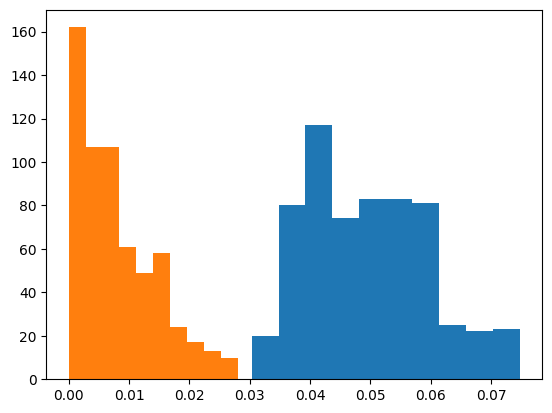

In [34]:
hist(abs(big_grid['p_L'][idxG]), label='p_L')
hist(abs(big_grid['p_D'][idxG]), label='p_D')